In [1]:
import sys
from pathlib import Path

# Notebook cell
%load_ext autoreload
%autoreload 2

# Get root directory (assuming notebook is in root/notebooks/)
NOTEBOOK_DIR = Path.cwd()
ROOT_DIR = NOTEBOOK_DIR.parent if NOTEBOOK_DIR.name == 'notebooks' else NOTEBOOK_DIR

# Add src directory to Python path
sys.path.append(str(ROOT_DIR / 'src'))

# Verify path
print(f"Python will look in these locations:\n{sys.path}")


# --- Execute the processor ---
import utils
from config import date_str, DOWNLOAD_DIR, DEST_DIR

print(f'date_str: {date_str}')



Python will look in these locations:
['C:\\Users\\ping\\.pyenv\\pyenv-win\\versions\\3.11.9\\python311.zip', 'C:\\Users\\ping\\.pyenv\\pyenv-win\\versions\\3.11.9\\DLLs', 'C:\\Users\\ping\\.pyenv\\pyenv-win\\versions\\3.11.9\\Lib', 'C:\\Users\\ping\\.pyenv\\pyenv-win\\versions\\3.11.9', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv', '', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv\\Lib\\site-packages', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv\\Lib\\site-packages\\win32', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv\\Lib\\site-packages\\win32\\lib', 'c:\\Users\\ping\\Files_win10\\python\\py311\\.venv\\Lib\\site-packages\\Pythonwin', 'c:\\Users\\ping\\Files_win10\\python\\py311\\stocks\\src']
date_str: 2025-04-23


In [2]:
# Override date_str for testing
# date_str = '2025-04-14'

In [3]:
import pandas as pd
# Set pandas display options to show more columns and rows
pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_rows', 10)       # Limit to 10 rows for readability
pd.set_option('display.width', 1000)        # Let the display adjust to the window
# pd.set_option('display.max_colwidth', None) # Show full content of each cell
pd.set_option('display.max_rows', 200)
# pd.set_option('display.width', 120)
pd.set_option('display.float_format', '{:.4f}'.format)

In [4]:
zscore_df = pd.read_parquet(f'..\data\{date_str}_zscore_df.parquet', engine='pyarrow')
cluster_stats_df = pd.read_parquet(f'..\data\{date_str}_cluster_stats_df.parquet', engine='pyarrow')
detailed_clusters_df = pd.read_parquet(f'..\data\{date_str}_detailed_clusters_df.parquet', engine='pyarrow')
df_data = pd.read_parquet(f'..\data\{date_str}_df_finviz_merged.parquet', engine='pyarrow')

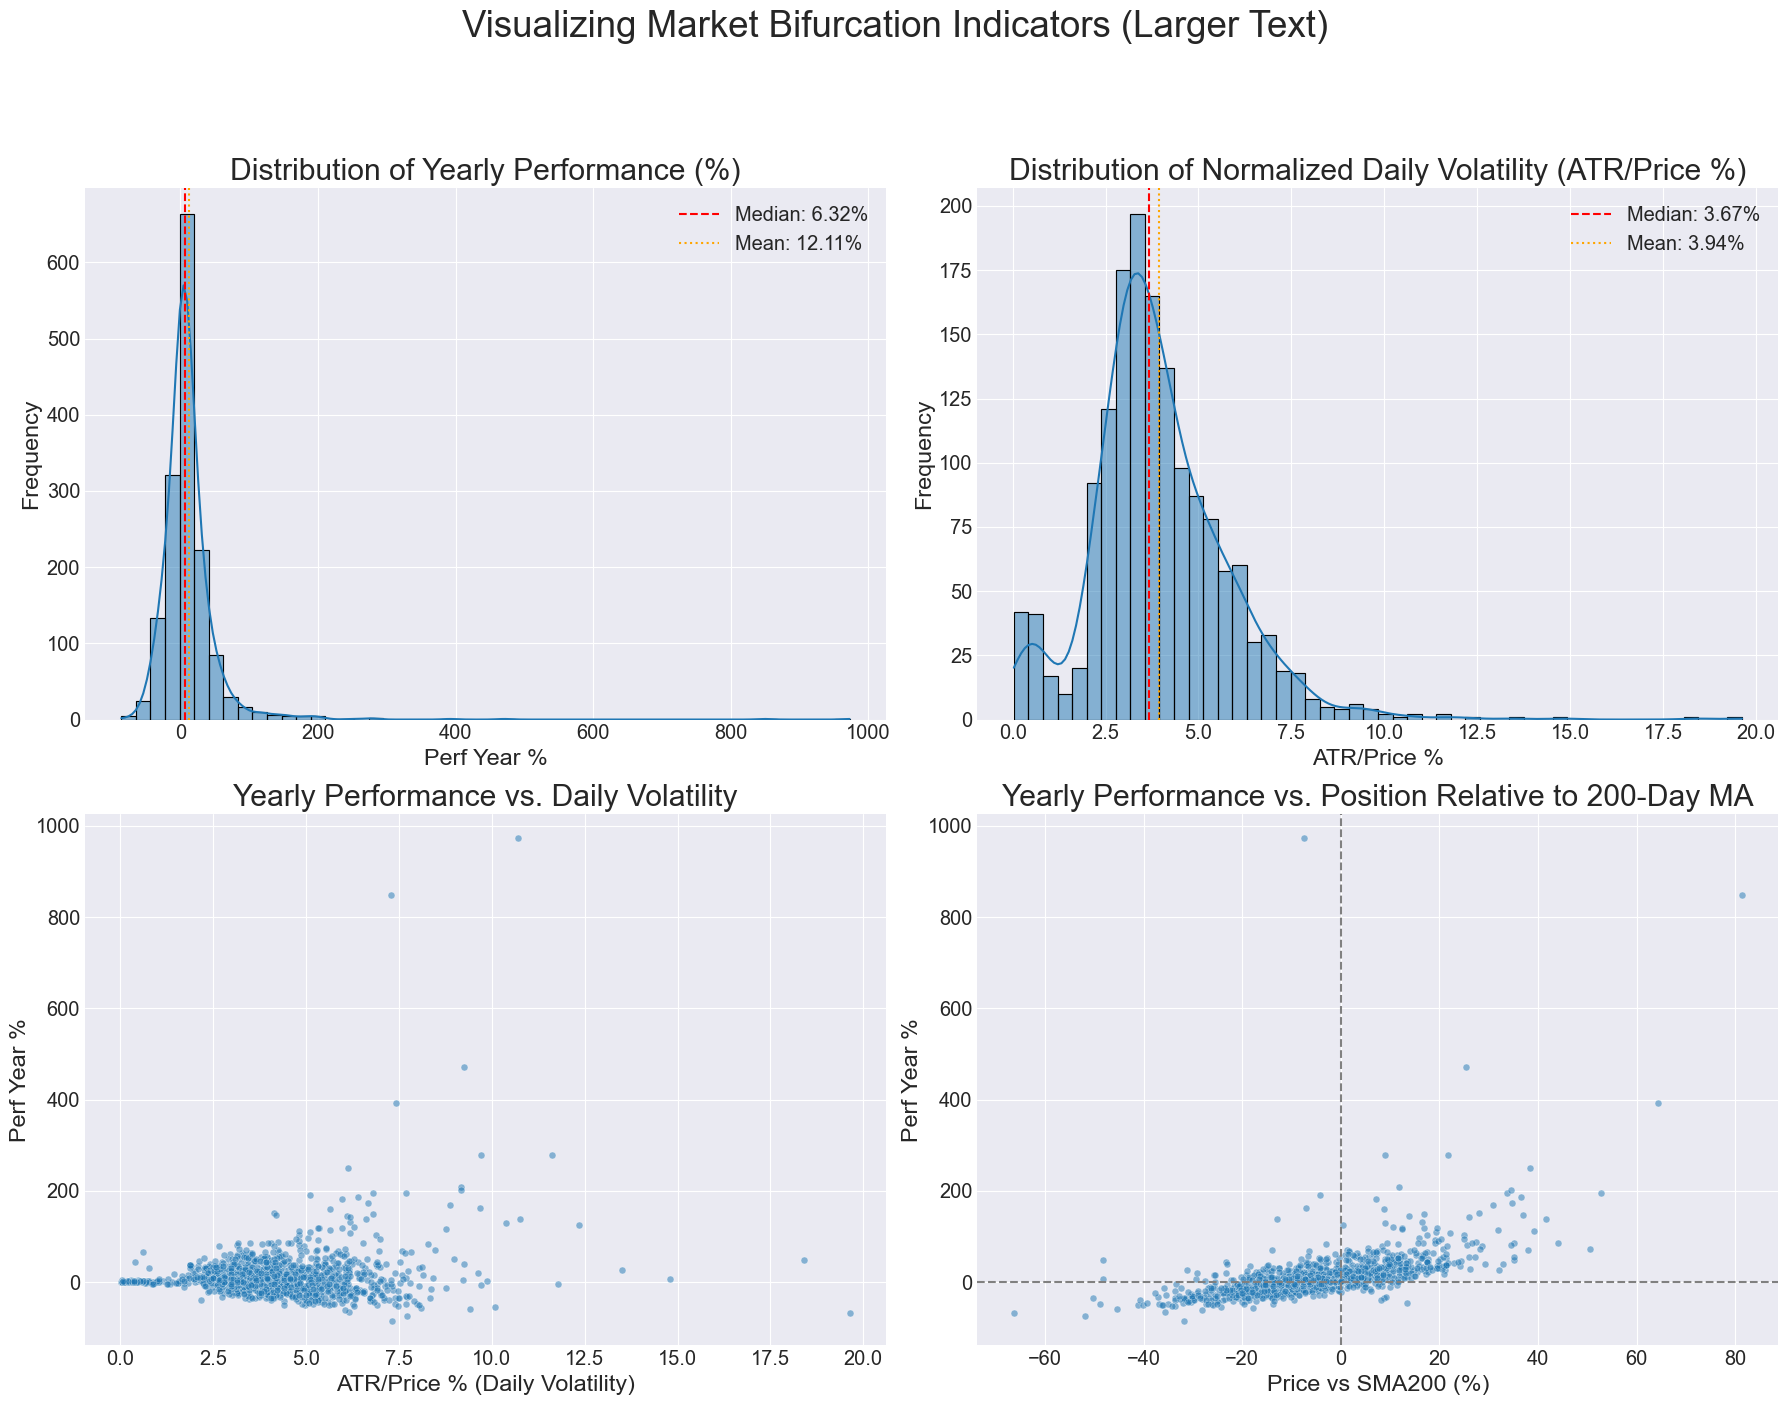

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Will be used if we need to handle potential infinite values if any

# --- IMPORTANT ---
# Ensure your DataFrame is named df_data and contains the columns used below.
# Example: (replace this with your actual data loading)
# df_data = pd.read_csv('your_market_data.csv')

# --- Data Cleaning (Optional but Recommended) ---
# Replace potential infinite values with NaN
df_data.replace([np.inf, -np.inf], np.nan, inplace=True)
# Use a copy to avoid modifying original if needed later
df_plot = df_data.copy()

# --- Font Size Definitions ---
SCALE_FONTSIZE = 1.2  # Scale factor for font sizes
TITLE_FONTSIZE = 18 * SCALE_FONTSIZE
AXIS_LABEL_FONTSIZE = 14 * SCALE_FONTSIZE
TICK_LABEL_FONTSIZE = 12 * SCALE_FONTSIZE
LEGEND_FONTSIZE = 12 * SCALE_FONTSIZE
SUPTITLE_FONTSIZE = 22 * SCALE_FONTSIZE

# --- Visualization ---

plt.style.use('seaborn-v0_8-darkgrid') # Use a visually appealing style
fig, axes = plt.subplots(2, 2, figsize=(18, 14)) # Increased figure size slightly for larger text
fig.suptitle('Visualizing Market Bifurcation Indicators (Larger Text)', fontsize=SUPTITLE_FONTSIZE, y=1.03) # Adjusted y position slightly

# 1. Histogram of Yearly Performance ('Perf Year %')
sns.histplot(data=df_plot, x='Perf Year %', kde=True, ax=axes[0, 0], bins=50)
axes[0, 0].set_title('Distribution of Yearly Performance (%)', fontsize=TITLE_FONTSIZE)
axes[0, 0].set_xlabel('Perf Year %', fontsize=AXIS_LABEL_FONTSIZE)
axes[0, 0].set_ylabel('Frequency', fontsize=AXIS_LABEL_FONTSIZE) # Added y-axis label
axes[0, 0].tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONTSIZE)
median_val = df_plot['Perf Year %'].median()
mean_val = df_plot['Perf Year %'].mean()
axes[0, 0].axvline(median_val, color='red', linestyle='--', label=f'Median: {median_val:.2f}%')
axes[0, 0].axvline(mean_val, color='orange', linestyle=':', label=f'Mean: {mean_val:.2f}%')
axes[0, 0].legend(fontsize=LEGEND_FONTSIZE)

# 2. Histogram of Normalized Volatility ('ATR/Price %')
sns.histplot(data=df_plot, x='ATR/Price %', kde=True, ax=axes[0, 1], bins=50)
axes[0, 1].set_title('Distribution of Normalized Daily Volatility (ATR/Price %)', fontsize=TITLE_FONTSIZE)
axes[0, 1].set_xlabel('ATR/Price %', fontsize=AXIS_LABEL_FONTSIZE)
axes[0, 1].set_ylabel('Frequency', fontsize=AXIS_LABEL_FONTSIZE) # Added y-axis label
axes[0, 1].tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONTSIZE)
median_val = df_plot['ATR/Price %'].median()
mean_val = df_plot['ATR/Price %'].mean()
axes[0, 1].axvline(median_val, color='red', linestyle='--', label=f'Median: {median_val:.2f}%')
axes[0, 1].axvline(mean_val, color='orange', linestyle=':', label=f'Mean: {mean_val:.2f}%')
axes[0, 1].legend(fontsize=LEGEND_FONTSIZE)

# 3. Scatter Plot: Yearly Performance vs. Normalized Volatility
sns.scatterplot(data=df_plot, x='ATR/Price %', y='Perf Year %', ax=axes[1, 0], alpha=0.5, s=25) # Slightly larger points
axes[1, 0].set_title('Yearly Performance vs. Daily Volatility', fontsize=TITLE_FONTSIZE)
axes[1, 0].set_xlabel('ATR/Price % (Daily Volatility)', fontsize=AXIS_LABEL_FONTSIZE)
axes[1, 0].set_ylabel('Perf Year %', fontsize=AXIS_LABEL_FONTSIZE)
axes[1, 0].tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONTSIZE)

# 4. Scatter Plot: Yearly Performance vs. Distance from 200-Day MA
sns.scatterplot(data=df_plot, x='SMA200 %', y='Perf Year %', ax=axes[1, 1], alpha=0.5, s=25) # Slightly larger points
axes[1, 1].set_title('Yearly Performance vs. Position Relative to 200-Day MA', fontsize=TITLE_FONTSIZE)
axes[1, 1].set_xlabel('Price vs SMA200 (%)', fontsize=AXIS_LABEL_FONTSIZE)
axes[1, 1].set_ylabel('Perf Year %', fontsize=AXIS_LABEL_FONTSIZE)
axes[1, 1].tick_params(axis='both', which='major', labelsize=TICK_LABEL_FONTSIZE)
axes[1, 1].axvline(0, color='grey', linestyle='--') # Line at 0% (on the SMA200)
axes[1, 1].axhline(0, color='grey', linestyle='--') # Line at 0% Perf Year

plt.tight_layout(rect=[0, 0.03, 1, 0.97]) # Adjust layout slightly for suptitle
plt.show()

In [6]:
detailed_clusters_df

,Cluster_ID,Ticker,Raw_Score,Risk_Adj_Score,Volatility,Price,"MktCap AUM, M"
30,1,DFS,1.2934,28.7872,0.0449,178.6900,44960.0000
117,1,UMC,0.7015,22.5692,0.0311,7.0200,17630.0000
168,1,CSGP,0.5571,20.1560,0.0276,81.8300,34510.0000
101,1,COF,0.7695,18.2685,0.0421,176.4600,67580.0000
121,1,COIN,0.6884,13.7473,0.0501,194.8000,49460.0000
...,...,...,...,...,...,...,...
418,60,WM,0.1084,7.5476,0.0144,228.6300,91990.0000
463,60,YUM,0.0622,3.0391,0.0205,146.1600,40710.0000
608,60,VRSK,-0.0871,-4.3426,0.0201,290.0500,40590.0000
761,60,VZ,-0.1992,-11.7311,0.0170,42.7000,180190.0000


In [9]:
# --- Fixed Parameters ---
select_top_n_clusters = 10
max_selection_per_cluster = 2
min_cluster_size = 3  # prevent extreme high risk adj scores
penalty_IntraCluster_Corr = 0
min_raw_score = 2.0 
min_risk_adj_score = 100.0 

output = utils.select_stocks_from_clusters(
    cluster_stats_df=cluster_stats_df,
    detailed_clusters_df=detailed_clusters_df,
    select_top_n_clusters=select_top_n_clusters,
    max_selection_per_cluster=max_selection_per_cluster,
    min_cluster_size=min_cluster_size,
    penalty_IntraCluster_Corr=penalty_IntraCluster_Corr,
    min_raw_score=min_raw_score,
    min_risk_adj_score=min_risk_adj_score,
    date_str=date_str # Pass the date
)

In [10]:
import pandas as pd # Import pandas if you're expecting DataFrames/Series

print("--- Printing Keys and Values in output dictionary ---")
for key, value in output.items():
    print(f"Key: {key}")
    if isinstance(value, (pd.DataFrame, pd.Series)):
        print(f"Value (first 5 rows/elements):\n{value.head()}\n")
    elif isinstance(value, dict):
        print(f"Value (is a dictionary):\n{value}\n")
    else:
        print(f"Value:\n{value}\n")


--- Printing Keys and Values in output dictionary ---
Key: selected_top_n_cluster_ids
Value:
[40, 35, 49, 12, 46, 31, 51, 3, 38, 53]

Key: selected_stocks
Value (first 5 rows/elements):
   Cluster_ID Ticker  Raw_Score  Risk_Adj_Score  Volatility   Price  MktCap AUM, M  Cluster_Composite_Cluster_Score  Cluster_Avg_IntraCluster_Corr  Cluster_Avg_Volatility  Cluster_Avg_Raw_Score  Cluster_Avg_Risk_Adj_Score  Cluster_Size  Weight
1          35    AMX     2.9702        123.7615      0.0240 16.8000     51420.0000                           1.1368                         0.7107                  0.0193                 1.1368                     60.6703       17.0000  0.5505
5          35    SBS     2.0877        101.0661      0.0207 19.7500     13500.0000                           1.1368                         0.7107                  0.0193                 1.1368                     60.6703       17.0000  0.4495

Key: cluster_performance
Value (first 5 rows/elements):
    Cluster_ID  Size  Avg

In [11]:
selected_top_n_cluster_ids= output['selected_top_n_cluster_ids']
print(f'selected_top_{select_top_n_clusters}_cluster_ids: {selected_top_n_cluster_ids}')


selected_top_10_cluster_ids: [40, 35, 49, 12, 46, 31, 51, 3, 38, 53]


In [12]:
import pandas as pd
import io # Needed for capturing string output if needed

print(f'====== Clusters picked by select_stocks_from_clusters ======')

# --- Parameters ---
num_clusters_to_process = 10
n_rows_per_cluster = 5
sort_column = 'Risk_Adj_Score'
ascending_sort = False
# --- End Parameters ---


# 1. Select only the first 'num_clusters_to_process' from the full list
if num_clusters_to_process <= 0:
    print("Number of clusters to process must be positive.")
    clusters_to_process = []
elif num_clusters_to_process >= len(selected_top_n_cluster_ids):
     print(f"Processing all {len(selected_top_n_cluster_ids)} clusters from the list.")
     clusters_to_process = selected_top_n_cluster_ids
else:
    clusters_to_process = selected_top_n_cluster_ids[:num_clusters_to_process]
    print(f"Processing the first {num_clusters_to_process} clusters: {clusters_to_process}")


# Proceed only if there are clusters to process
if clusters_to_process:

    # 2. Filter the DataFrame
    filtered_df = detailed_clusters_df[
        detailed_clusters_df['Cluster_ID'].isin(clusters_to_process)
    ].copy()

    if filtered_df.empty:
        print(f"\nNo rows found for the selected Cluster_IDs: {clusters_to_process}")
    else:
        # 3. Convert to ordered categorical
        filtered_df['Cluster_ID'] = pd.Categorical(
            filtered_df['Cluster_ID'],
            categories=clusters_to_process,
            ordered=True
        )

        # --- Method 1: Sort then Head ---
        # print("\n--- Method 1: Sort then Head ---")
        sorted_df = filtered_df.sort_values(
            by=['Cluster_ID', sort_column],
            ascending=[True, ascending_sort]
        )
        top_n_per_cluster_df = sorted_df.groupby(
            'Cluster_ID',
            observed=True,
            group_keys=False
        ).head(n_rows_per_cluster)

        print(f"\nTop {n_rows_per_cluster} Rows per Cluster (for first {num_clusters_to_process} clusters: {clusters_to_process})")
        print(f"Sorted by '{sort_column}' (Ascending={ascending_sort}) within each cluster")

        # --- REVISED PRINTING SECTION V2: Format Once, Print Line-by-Line ---
        if top_n_per_cluster_df.empty:
            print("No data to display after filtering and selection.")
        else:
            # 1. Get the entire formatted string WITH index
            # Use index=True so we can potentially match rows if needed,
            # but primarily to let pandas calculate all column widths correctly.
            full_output_string = top_n_per_cluster_df.to_string(index=True)

            # 2. Split into lines
            lines = full_output_string.splitlines() # Use splitlines() to handle different line endings

            # 3. Print the header line
            print(lines[0])

            last_cluster_id = None
            # 4. Iterate through the *DataFrame rows* alongside the formatted lines
            # We use range(len(...)) to easily access the corresponding line index
            for i in range(len(top_n_per_cluster_df)):
                # Get the actual Cluster_ID from the DataFrame row
                current_cluster_id = top_n_per_cluster_df.iloc[i]['Cluster_ID']

                # Check if cluster ID has changed
                if last_cluster_id is not None and current_cluster_id != last_cluster_id:
                    print(f'-'*83) # Print separator

                # Print the corresponding pre-formatted line (data starts at lines[1])
                print(lines[i + 1])

                # Update the tracker
                last_cluster_id = current_cluster_id
        # --- END REVISED PRINTING SECTION V2 ---

else:
     print("\nNo clusters selected for processing based on 'num_clusters_to_process'.")



====== Clusters picked by select_stocks_from_clusters ======
Processing all 10 clusters from the list.

Top 5 Rows per Cluster (for first 10 clusters: [40, 35, 49, 12, 46, 31, 51, 3, 38, 53])
Sorted by 'Risk_Adj_Score' (Ascending=False) within each cluster
    Cluster_ID Ticker  Raw_Score  Risk_Adj_Score  Volatility    Price  MktCap AUM, M
4           40   BNTX     2.2133         57.2443      0.0387 114.8300     27560.0000
0           40   SMMT     4.3715         53.0197      0.0825  33.2300     24510.0000
174         40   TGTX     0.5434         17.7665      0.0306  39.4900      6200.0000
-----------------------------------------------------------------------------------
1           35    AMX     2.9702        123.7615      0.0240  16.8000     51420.0000
11          35     KT     1.6202        109.9325      0.0147  18.6400      9160.0000
7           35     PM     1.8730        105.3718      0.0178 168.1100    261660.0000
5           35    SBS     2.0877        101.0661      0.0207  19

In [13]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import pandas as pd
import numpy as np

def plot_cluster_statistics(cluster_stats_df, selected_cluster_ids, highlight_color='green', figsize=(12, 16)):
    """
    Generates and displays a 5-panel plot visualizing various cluster statistics.

    Args:
        cluster_stats_df (pd.DataFrame): DataFrame containing cluster statistics.
                                         Must include columns: 'Cluster_ID',
                                         'Avg_Risk_Adj_Score', 'Avg_Raw_Score',
                                         'Avg_IntraCluster_Corr', 'Avg_Volatility', 'Size'.
        selected_cluster_ids (list or set): A collection of Cluster_IDs to highlight
                                            on the plots.
        highlight_color (str, optional): The color used to highlight the bars
                                         corresponding to selected_cluster_ids.
                                         Defaults to 'green'.
        figsize (tuple, optional): The figure size for the plot.
                                   Defaults to (12, 16).
    """
    # Ensure Cluster_ID is suitable for indexing/lookup if it's not already
    # (e.g., if it came from clustering that starts at 1 instead of 0)
    # This assumes cluster IDs are sequential integers starting near 0.
    cluster_ids = cluster_stats_df['Cluster_ID'].values

    # --- Define constants and styles inside the function ---
    HIGHLIGHT_COLOR = highlight_color
    major_grid_style = {'color': 'lightgray', 'linestyle': '--', 'linewidth': 0.6}
    minor_x_grid_style = {'color': 'gray', 'linestyle': '-', 'linewidth': 0.8}

    # --- Define nested helper functions ---
    def create_bars(ax, x, y, color, highlight_ids):
        """Creates bars, highlighting specific IDs."""
        # Ensure highlight_ids is a set for efficient lookup
        highlight_set = set(highlight_ids)
        bar_colors = [HIGHLIGHT_COLOR if cl_id in highlight_set else color for cl_id in x]
        bars = ax.bar(x, y, color=bar_colors, width=0.8)
        return bars

    def configure_axis(ax, title, ylabel, show_xlabel=True):
        """Applies common configuration to an axis."""
        ax.set_title(title)
        ax.set_ylabel(ylabel)
        if show_xlabel:
             ax.set_xlabel('Cluster_ID')

        # Gridlines
        ax.yaxis.grid(True, **major_grid_style)
        ax.xaxis.grid(True, which='major', **major_grid_style)
        ax.xaxis.set_minor_locator(mticker.MultipleLocator(5))
        ax.xaxis.grid(True, which='minor', **minor_x_grid_style)
        ax.tick_params(axis='x', which='minor', bottom=False)

    # --- Create Figure and Axes ---
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, figsize=figsize)
    fig.suptitle('Cluster Statistics Analysis', fontsize=16)

    # --- Plotting ---

    # Plot 1: Average Risk-Adjusted Score
    create_bars(ax1, cluster_ids, cluster_stats_df['Avg_Risk_Adj_Score'],
                'skyblue', selected_cluster_ids)
    configure_axis(ax1, 'Average Risk-Adjusted Scores by Cluster', 'Average Risk-Adj Score')

    # Plot 2: Average Raw Score
    create_bars(ax2, cluster_ids, cluster_stats_df['Avg_Raw_Score'],
                'lightgreen', selected_cluster_ids)
    configure_axis(ax2, 'Average Raw Scores by Cluster', 'Average Raw Score')

    # Plot 3: Average Correlation
    create_bars(ax3, cluster_ids, cluster_stats_df['Avg_IntraCluster_Corr'],
                'salmon', selected_cluster_ids)
    configure_axis(ax3, 'Average Intra-Cluster Correlation', 'Average Correlation')

    # Plot 4: Average Volatility
    create_bars(ax4, cluster_ids, cluster_stats_df['Avg_Volatility'],
                'gold', selected_cluster_ids)
    configure_axis(ax4, 'Average Intra-Cluster Volatility', 'Average Volatility')

    # Plot 5: Cluster Size
    create_bars(ax5, cluster_ids, cluster_stats_df['Size'],
                'orchid', selected_cluster_ids)
    configure_axis(ax5, 'Cluster Sizes', 'Number of Members')

    # --- Final Adjustments ---
    num_clusters = len(cluster_ids)
    # Adjust major ticks based on number of clusters for better readability
    if num_clusters <= 20:
        tick_step = 2
    elif num_clusters <= 50:
        tick_step = 5
    else:
        tick_step = 10 # Default for 60+

    major_ticks = np.arange(min(cluster_ids), max(cluster_ids) + 1, tick_step)

    # Apply x-axis limits and consistent major ticks to all axes
    min_id = min(cluster_ids)
    max_id = max(cluster_ids)
    for ax in [ax1, ax2, ax3, ax4, ax5]:
        ax.set_xlim(min_id - 0.5, max_id + 0.5)
        ax.set_xticks(major_ticks)

    # Adjust layout to prevent overlap
    plt.tight_layout(rect=[0, 0.03, 1, 0.96]) # Adjust rect for suptitle

    plt.show()


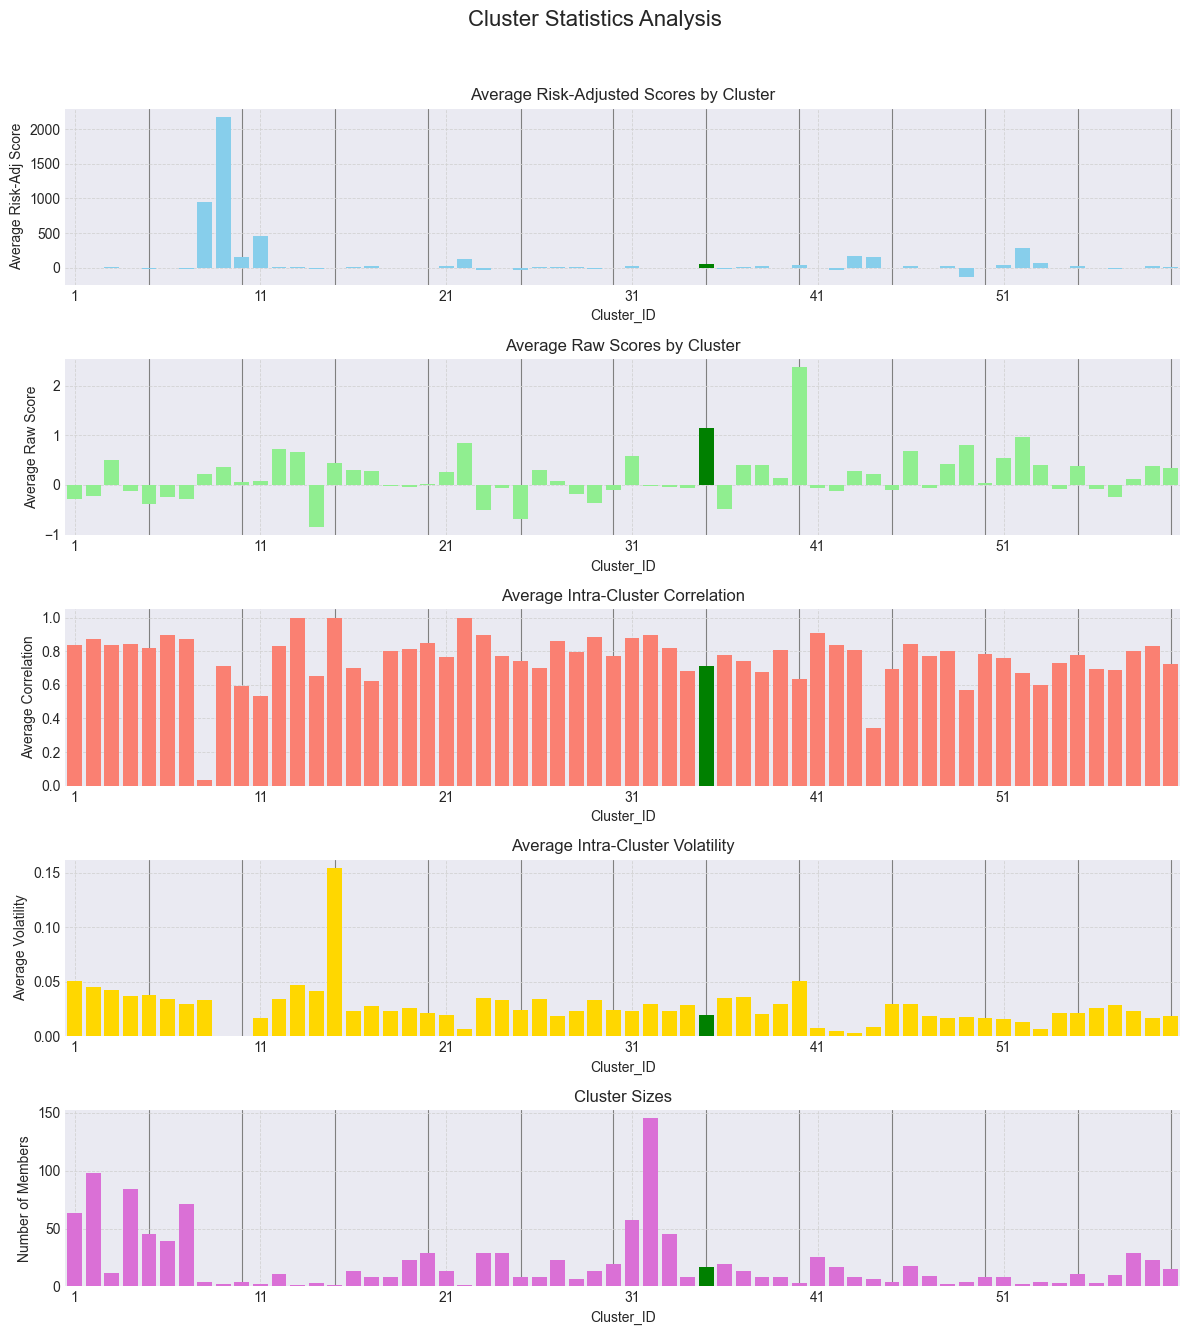

In [14]:
selected_stocks = output['selected_stocks']
# selected_stocks = output['selected_stocks']
selected_cluster_ids = selected_stocks['Cluster_ID'].unique()

plot_cluster_statistics(cluster_stats_df, selected_cluster_ids, highlight_color='green', figsize=(12, 14))

# You can also change the highlight color or figure size:
# plot_cluster_statistics(cluster_stats_df, final_cluster_ids, highlight_color='red', figsize=(10, 14))

In [15]:
utils.print_stock_selection_report(output)


=== CLUSTER SELECTION CRITERIA ===
* Using Composite_Cluster_Score (balancing Raw Score and diversification) for cluster ranking.
* Using Risk_Adj_Score for stock selection within clusters.
* Selected top 10 clusters from N/A total initial clusters.
* Selection Criteria:
    date_str: 2025-04-23
    select_top_n_clusters: 10
    max_selection_per_cluster: 2
    min_cluster_size: 3
    min_raw_score: 2.0
    min_risk_adj_score: 100.0
    penalty_IntraCluster_Corr: 0

=== SELECTED CLUSTERS (RANKED BY COMPOSITE SCORE) ===
 Cluster_ID  Size  Avg_Raw_Score  Avg_Risk_Adj_Score  Avg_IntraCluster_Corr  Avg_Volatility  Composite_Cluster_Score  Stocks_Selected  Intra_Cluster_Diversification
         40     3         2.3761             42.6768                 0.6338          0.0506                   2.3761                0                         0.3662
         35    17         1.1368             60.6703                 0.7107          0.0193                   1.1368                2           